In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned data

In [2]:
df = pd.read_csv('./Data/cleaned_housePrice.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3243,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3244,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3245,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3246,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# Select features for clustering

In [3]:
features_for_clustering = ['Area', 'Room', 'Price', 'Parking', 'Warehouse', 'Elevator']

# Scale the data before clustering

In [4]:
print("\nScaling data...")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])


Scaling data...


# Use the Elbow Method to find the optimal number of clusters (K)

Finding optimal number of clusters (K) using the Elbow Method...


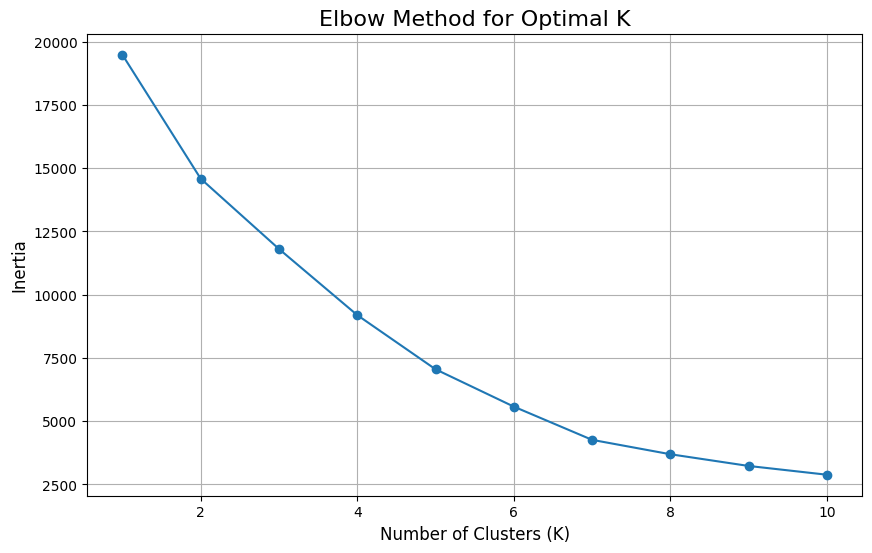

In [5]:
print("Finding optimal number of clusters (K) using the Elbow Method...")
inertia = []
range_of_clusters = range(1, 11)
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
# plt.savefig('elbow_method.png')
# print("Elbow method plot saved as 'elbow_method.png'.")

# Based on the plot, choose an optimal K (e.g., 3)

In [6]:
optimal_k = 3 
print(f"\nApplying KMeans clustering with K = {optimal_k}...")
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(df_scaled)


Applying KMeans clustering with K = 3...


# Analyze the clusters

In [7]:
print(f"\n--- Analysis of {optimal_k} Clusters ---")
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"Number of properties: {len(cluster_data)}")
    print(cluster_data[features_for_clustering].describe().T)


--- Analysis of 3 Clusters ---

Cluster 0:
Number of properties: 2730
        count          mean           std         min           25%  \
Area   2730.0  2.146634e+06  7.995515e+07        35.0  7.500000e+01   
Room   2730.0  2.181319e+00  7.392189e-01         0.0  2.000000e+00   
Price  2730.0  6.175328e+09  8.655371e+09  55000000.0  1.972000e+09   

                50%           75%           max  
Area   9.600000e+01  1.300000e+02  3.310000e+09  
Room   2.000000e+00  3.000000e+00  5.000000e+00  
Price  3.450000e+09  7.000000e+09  9.240000e+10  

Cluster 1:
Number of properties: 516
       count          mean           std        min          25%          50%  \
Area   516.0  8.343411e+01  1.651636e+02       30.0         52.0         65.0   
Room   516.0  1.593023e+00  7.057804e-01        0.0          1.0          2.0   
Price  516.0  1.762447e+09  4.166445e+09  3600000.0  587250000.0  947500000.0   

                75%           max  
Area   8.000000e+01  3.600000e+03  
Room   2.

In [8]:
print("\nClustering analysis complete.")


Clustering analysis complete.
